In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import mplhep as hep
import hist
from hist import Hist
plt.style.use(hep.style.CMS)
plt.rcParams.update({'font.size': 32})

In [2]:
z = np.array([500., 510., 520., 530., 540., 550., 560.])
z_edges = np.array([495., 505., 515., 525., 535., 545., 555., 565.])
bremcount = np.array([191, 51, 38, 30, 8, 3, 6])
error = np.sqrt(bremcount)
logbremcount = np.log(bremcount)
logerror = np.log(np.sqrt(bremcount))
def linear(x,a,b):
    return math.log(a)+ b*(x-250)
def exp(x,a,b):
    return a*np.exp(b*(x-250))

In [3]:
def chi2(popt, z, count, error):
    expected = exp(z, popt[0], popt[1])
    chi2 = 0
    for i in range(len(expected)):
        chi2 += ((expected[i]-count[i])/error[i])**2
    return chi2

In [4]:
popt, pcov = curve_fit(linear, z, logbremcount)
print(popt)
print(1/popt[1])
print(np.sqrt(pcov))
print(np.sqrt(pcov[1][1])/(popt[1])**2)

print("Chi2 of fit:", chi2(popt, z, bremcount, error))
print("Chi2 of fit (Josh's best fit params):", chi2([6.17938516e+08, -6.10720507e-02], z, bremcount, error))

[ 9.14274383e+08 -6.28789761e-02]
-15.903566860451459
[[2.52510154e+09            nan]
 [           nan 9.83873587e-03]]
2.4884469116751795
Chi2 of fit: 33.07865917160624
Chi2 of fit (Josh's best fit params): 36.59791736216731


/tmp/ipykernel_20653/3458845181.py:4: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(pcov))


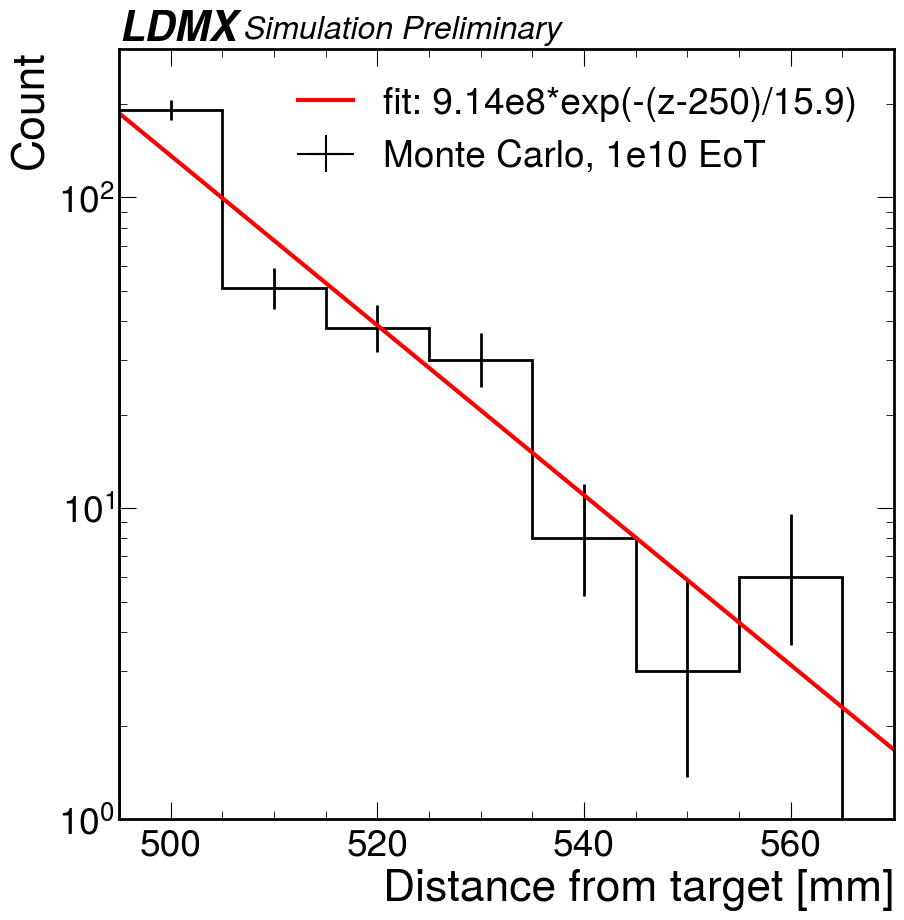

In [5]:
h = Hist(hist.axis.Regular(bins=7, start=495, stop=565, name="brem decay position"))

for i in range(len(z)):
    for j in range(bremcount[i]):
        h.fill(z[i])

fig, ax = plt.subplots()
h.plot1d(color='black', linewidth=2.0, label='Monte Carlo, 1e10 EoT')
ax.plot(np.linspace(400, 600, 40), exp(np.linspace(400, 600, 40), popt[0], popt[1]), linewidth=3, color='r',label='fit: {0}*exp(-(z-250)/{1})'.format('9.14e8', round(-1/popt[1],1)))
ax.legend()
ax.set_xlim((495, 570))
ax.set_ylim((1, 300))
ax.set_xlabel('Distance from target [mm]')
ax.set_ylabel('Count')
ax.set_yscale('log')
hep.cms.text(text="Simulation Preliminary", loc=0, ax=ax,
            **{"exp": "LDMX", "exp_weight": "bold", "fontsize": 23, "italic": (True, True)})
plt.show()

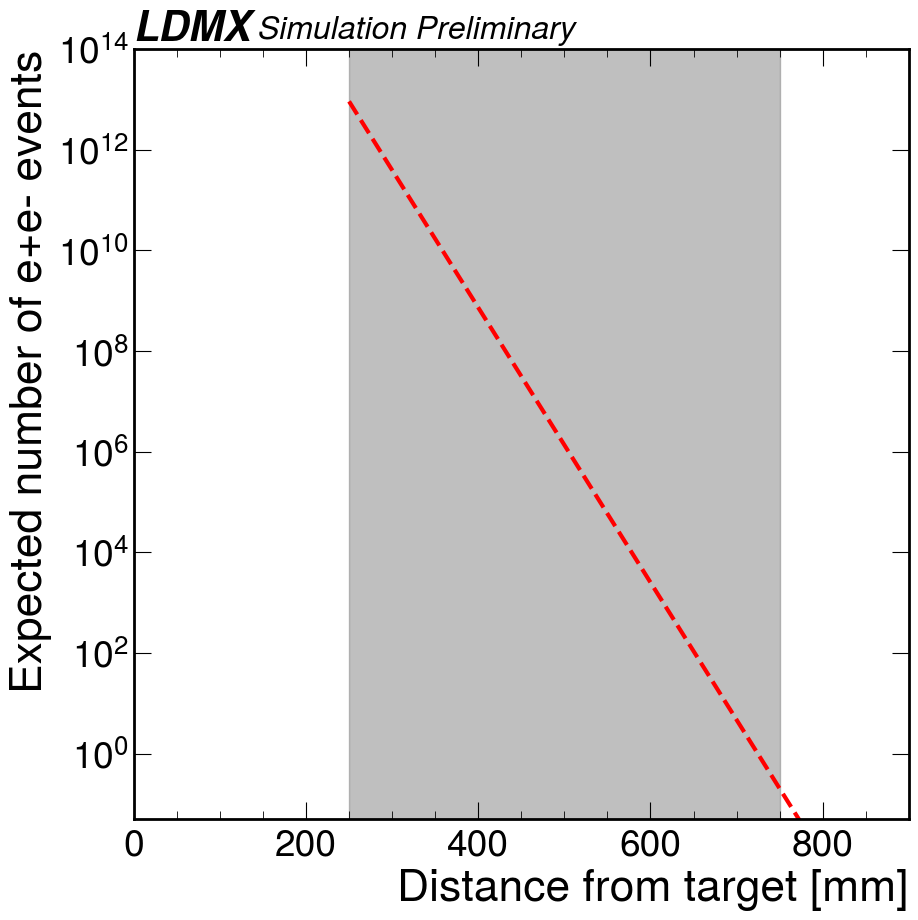

In [17]:
fig, ax = plt.subplots()
ax.plot(np.linspace(250, 800, 110), exp(np.linspace(250, 800, 110), 1e4*popt[0], popt[1]), linewidth=3, linestyle='--', color='r',label='{0}*exp(-(z-250)/{1})'.format('9.14e12', round(-1/popt[1],1)))
ax.axvspan(250, 750, alpha=0.5, color='grey')
#ax.legend()
ax.set_xlim((0, 900))
ax.set_ylim((0.05, 1e14))
ax.set_xlabel('Distance from target [mm]')
ax.set_ylabel('Expected number of e+e- events')
ax.set_yscale('log')
hep.cms.text(text="Simulation Preliminary", loc=0, ax=ax,
            **{"exp": "LDMX", "exp_weight": "bold", "fontsize": 23, "italic": (True, True)})
plt.show()